In [ ]:
# 1 - Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)



In [ ]:
# 2 - Lendo os arquivos e concatenando  os dados
arquivos = {
    '2023': 'Leitos_2023.csv',
    '2024': 'Leitos_2024.csv'
}

dfs = {}
for ano, f in arquivos.items():
    dfs[ano] = pd.read_csv(f, sep=",", encoding="latin-1", low_memory=False)

dfs['2023'].head()


,COMP,REGIAO,UF,MUNICIPIO,MOTIVO_DESABILITACAO,CNES,NOME_ESTABELECIMENTO,RAZAO_SOCIAL,TP_GESTAO,CO_TIPO_UNIDADE,DS_TIPO_UNIDADE,NATUREZA_JURIDICA,DESC_NATUREZA_JURIDICA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,NO_BAIRRO,CO_CEP,NU_TELEFONE,NO_EMAIL,LEITOS_EXISTENTES,LEITOS_SUS,UTI_TOTAL_EXIST,UTI_TOTAL_SUS,UTI_ADULTO_EXIST,UTI_ADULTO_SUS,UTI_PEDIATRICO_EXIST,UTI_PEDIATRICO_SUS,UTI_NEONATAL_EXIST,UTI_NEONATAL_SUS,UTI_QUEIMADO_EXIST,UTI_QUEIMADO_SUS,UTI_CORONARIANA_EXIST,UTI_CORONARIANA_SUS
0,202301,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,5,HOSPITAL GERAL,2062,HOSPITAL_PRIVADO,AVN PRESIDENTE GETULIO VARGAS,428,NaN,CENTRO,54505560,(81)35210355,NaN,64,0,0,0,0,0,0,0,0,0,0,0,0,0
1,202301,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,35,HOSPITAL MENDO SAMPAIO,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,M,5,HOSPITAL GERAL,1244,HOSPITAL_PÚBLICO,BR 101 SUL KM 33,S/N,NaN,CHARNECA,54535430,(81)35210857,NaN,19,19,0,0,0,0,0,0,0,0,0,0,0,0
2,202301,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,94,MATERNIDADE PADRE GERALDO LEITE BASTOS,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,M,7,HOSPITAL ESPECIALIZADO,1244,HOSPITAL_PÚBLICO,BR 101 SUL KM 23,S/N,NaN,PONTE DOS CARVALHOS,54510000,(81)35221626,NaN,18,18,0,0,0,0,0,0,0,0,0,0,0,0
3,202301,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,183,HOSPITAL SAMARITANO,SOCIEDADE HOSPITALAR SAMARITANO LTDA,M,5,HOSPITAL GERAL,2062,HOSPITAL_PRIVADO,RUA SEVERINO BEZERRA MARQUES,40,NaN,CENTRO,54510460,(81)35210109,NaN,59,0,5,0,5,0,0,0,0,0,0,0,0,0
4,202301,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,221,HOSPITAL SAO SEBASTIAO,CASA DE SAUDE E MATERNIDADE SAO SEBASTIAO LTDA,M,5,HOSPITAL GERAL,2062,HOSPITAL_PRIVADO,AVN PRESIDENTE GETULIO VARGAS,864,NaN,CENTRO,54505560,(81)35214150,ADM@HOSPITALSAOSEBASTIAO.COM.BR,47,0,10,0,10,0,0,0,0,0,0,0,0,0


In [ ]:
# 3 - Tratando os dados de cada ano
colunas = ['COMP', 'REGIAO', 'UF', 'LEITOS_EXISTENTES', 'LEITOS_SUS']

for ano in dfs:
    df = dfs[ano][colunas].copy()
    df['LEITOS_EXISTENTES'] = pd.to_numeric(df['LEITOS_EXISTENTES'], errors='coerce').fillna(0)
    df['LEITOS_SUS'] = pd.to_numeric(df['LEITOS_SUS'], errors='coerce').fillna(0)
    dfs[ano] = df

dfs['2023'].head()


,COMP,REGIAO,UF,LEITOS_EXISTENTES,LEITOS_SUS
0,202301,NORDESTE,PE,64,0
1,202301,NORDESTE,PE,19,19
2,202301,NORDESTE,PE,18,18
3,202301,NORDESTE,PE,59,0
4,202301,NORDESTE,PE,47,0


In [ ]:
# 4 - Resumindo por Regiao

resumo = {}
for ano, df in dfs.items():
    resumo[ano] = (
        df.groupby("REGIAO")[["LEITOS_EXISTENTES","LEITOS_SUS"]]
        .sum()
        .reset_index()
    )

resumo['2023']


,REGIAO,LEITOS_EXISTENTES,LEITOS_SUS
0,CENTRO-OESTE,554911,347462
1,NORDESTE,1619573,1258878
2,NORTE,452878,356406
3,SUDESTE,2524290,1499129
4,SUL,953720,660898


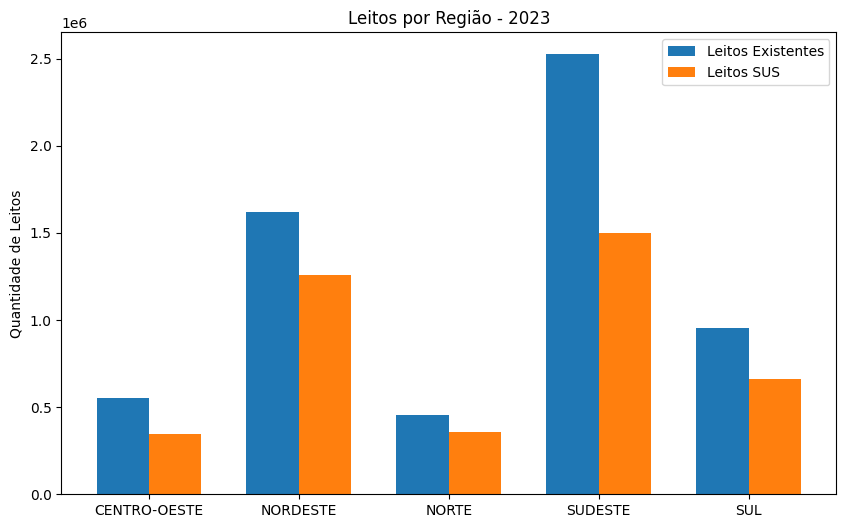

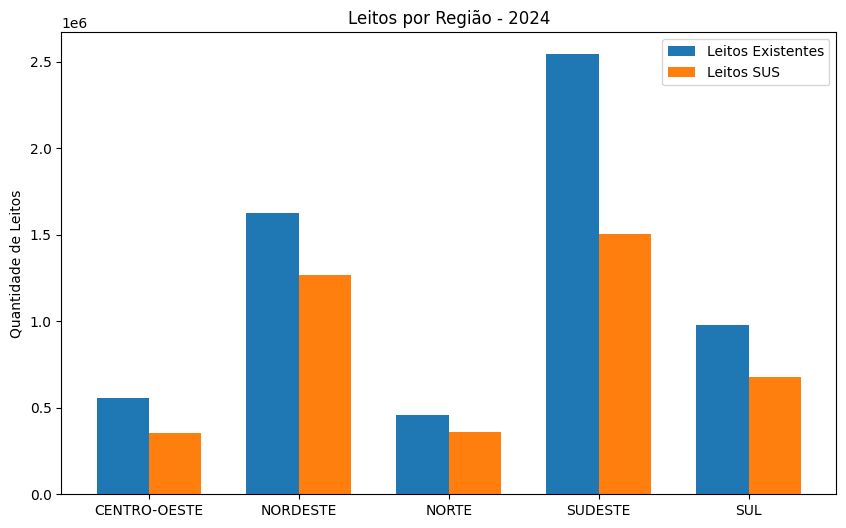

In [ ]:
# 5 -  Graficos comparativos por Regiao e Ano

for ano, df in resumo.items():
    plt.figure(figsize=(10,6))
    bar_width = 0.35
    x = range(len(df))

    plt.bar(x, df["LEITOS_EXISTENTES"], width=bar_width, label="Leitos Existentes")
    plt.bar([i + bar_width for i in x], df["LEITOS_SUS"], width=bar_width, label="Leitos SUS")

    plt.xticks([i + bar_width/2 for i in x], df["REGIAO"])
    plt.ylabel("Quantidade de Leitos")
    plt.title(f"Leitos por Região - {ano}")
    plt.legend()
    plt.show()


In [ ]:


# 6 -  Calculando a Porcentagem de Leitos SUS
for ano, df in resumo.items():
    df["%_SUS"] = (df["LEITOS_SUS"] / df["LEITOS_EXISTENTES"] * 100).round(2)
    print(f"\n===== {ano} =====")
    print(df)



===== 2023 =====
         REGIAO  LEITOS_EXISTENTES  LEITOS_SUS  %_SUS
0  CENTRO-OESTE             554911      347462  62.62
1      NORDESTE            1619573     1258878  77.73
2         NORTE             452878      356406  78.70
3       SUDESTE            2524290     1499129  59.39
4           SUL             953720      660898  69.30

===== 2024 =====
         REGIAO  LEITOS_EXISTENTES  LEITOS_SUS  %_SUS
0  CENTRO-OESTE             557722      356424  63.91
1      NORDESTE            1625946     1269636  78.09
2         NORTE             458546      359281  78.35
3       SUDESTE            2542774     1503820  59.14
4           SUL             975560      680034  69.71
